## Welcome to the Proper Hands On Session Involving Decision Trees!  

### Our Objective is to perform a Multi Class Classification problem where we have the below:  

-  Attribute Information:
	1. Class Name: 3 (L, B, R)
	2. Left-Weight: 5 (1, 2, 3, 4, 5)
	3. Left-Distance: 5 (1, 2, 3, 4, 5)
	4. Right-Weight: 5 (1, 2, 3, 4, 5)
	5. Right-Distance: 5 (1, 2, 3, 4, 5)
-  Nomenclature:
    1. L: The Balance Scale is **Left**  
    2. B: The scale is properly **balanced**  
    3. R: The balance scale is tipped to **Right Side**  

- Find more about dataset here: [Balance Scale UCI link](https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/)

In [11]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [12]:
balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+'databases/balance-scale/balance-scale.data',sep= ',', header = None,
                           names = ['class_name','left_weight','left_distance','right_weight','right_distance'])

In [13]:
# Printing the dataswet shape 
print("Dataset Length: ", len(balance_data)) 
print("Dataset Shape: ", balance_data.shape) 
print(balance_data.info())

Dataset Length:  625
Dataset Shape:  (625, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class_name      625 non-null    object
 1   left_weight     625 non-null    int64 
 2   left_distance   625 non-null    int64 
 3   right_weight    625 non-null    int64 
 4   right_distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB
None


In [14]:
# Printing the dataset obseravtions 
balance_data.head() 

,class_name,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [15]:
# Exploring the Target Variable

target_var = balance_data.iloc[:,0]
print(target_var.value_counts())

# Let's check the Class Name Distribution

print('% i Class L',round(target_var.value_counts()[0]/len(target_var)*100,2))
print('% i Class R',round(target_var.value_counts()[1]/len(target_var)*100,2))
print('% i Class B',round(target_var.value_counts()[2]/len(target_var)*100,2))

L    288
R    288
B     49
Name: class_name, dtype: int64
% i Class L 46.08
% i Class R 46.08
% i Class B 7.84


-  Number of Instances: 625 (49 balanced, 288 left, 288 right)

-  Class Distribution: 
   1. **46.08%** are L
   2. **46.08%** are R
   3. **7.84%** are B 

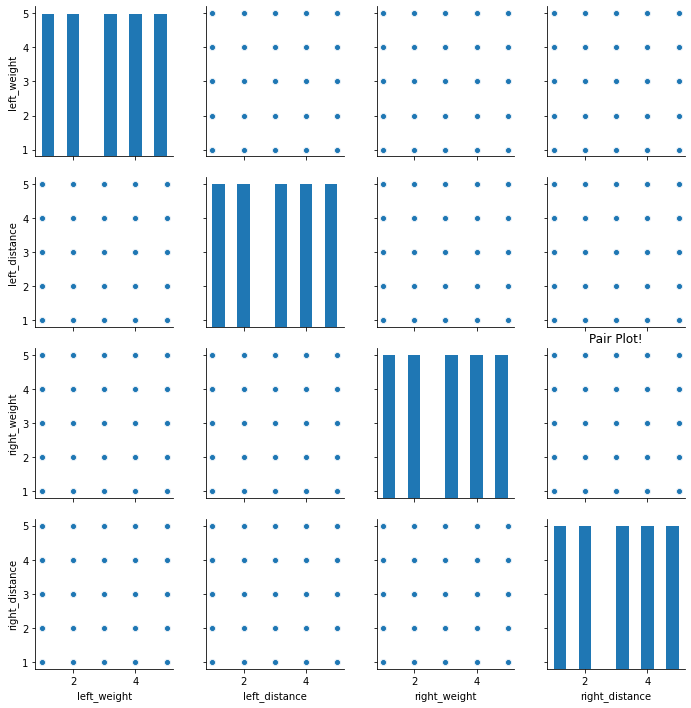

In [16]:
# Pairplot
sns.pairplot(balance_data);
plt.title('Pair Plot!');

Clearly, we can see no dependancy among the features!

In [17]:
# Checking for Missing values

def check_missing_values_function(df):
    missing_values = df.isnull().sum()
    missing_values_percent =round(100*(df.isnull().sum()/len(df)),2)
    dtype = df.dtypes
    info_df = pd.DataFrame({'Missing Value Count':missing_values,'% of Missing':missing_values_percent,'DTYPE': dtype})
    info_df.sort_values(by = '% of Missing',inplace=True,ascending=False)
    return info_df

check_missing_values_function(balance_data)

,Missing Value Count,% of Missing,DTYPE
class_name,0,0.0,object
left_weight,0,0.0,int64
left_distance,0,0.0,int64
right_weight,0,0.0,int64
right_distance,0,0.0,int64


- Number of Attributes: 4 (numeric) + class name = 5

- Missing Attribute Values: 
	**NONE**

So basically we have 3 levels of Target Levels which we want to target

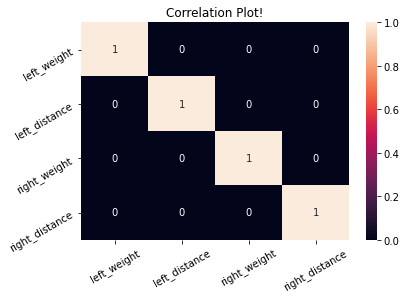

In [18]:
sns.heatmap(balance_data.corr(),annot=True);
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title('Correlation Plot!');

Decision trees and Random Forests are immune to the feature magnitude and hence its not required.

### Now, comes MODELLING a Decision Tree for finding the LABEL!  
 - First, we will use GINI INDEX Methodology  
 - Second, using the ID3, ENTROPY Methodology!  
 - Our Evaluation Metric is **Accuracy/Confusion Matrix**

**Gini Index Decision Tree**

In [19]:
# Separating the target variable 
predictor_variables = balance_data.values[:, 1:5] 
target_variables = balance_data.values[:, 0] 

# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variables, test_size = 0.3, random_state = 100) 

In [20]:
# Modelling using the GINI INDEX Score methodology
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,max_depth=3, 
                                  min_samples_leaf=5) 

# Performing training 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [21]:
# Making predictions on the TEST SET
y_pred = clf_gini.predict(X_test) 
print("Predicted values:")
print()
print(y_pred)

Predicted values:

['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']


In [22]:
# Since, this is a MultiClass Classification Problem, We need to see the CLASSIFICATION REPORT
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100) 
print()
print("Report : ", classification_report(y_test, y_pred)) 

Confusion Matrix: 
[[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]

Accuracy :  73.40425531914893

Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



**Entropy Decision Tree!**

In [23]:
# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                     random_state = 100,max_depth = 3, 
                                     min_samples_leaf = 5) 

# Performing training
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [24]:
# Making predcitions on the TEST SET
y_pred = clf_entropy.predict(X_test) 
print("Predicted values:")
print()
print(y_pred)


Predicted values:

['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']


In [25]:
# Since, this is a MultiClass Classification Problem, We need to see the CLASSIFICATION REPORT
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100) 
print()
print("Report : ", classification_report(y_test, y_pred)) 

Confusion Matrix: 
[[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]

Accuracy :  70.74468085106383

Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.71      0.74      0.72        85
           R       0.71      0.78      0.74        90

    accuracy                           0.71       188
   macro avg       0.47      0.51      0.49       188
weighted avg       0.66      0.71      0.68       188



#### Hyper-parameter Tuning!  
- Define a Dictionary of Parameters.  
- Pass the dictioary as **parameter arguments**  
- Run the Decision Tree using **Grid Search CV method**!

In [26]:
param_grid = {
    'max_depth': [2,5,8,11,14,17,20],
    'min_samples_leaf': [5,10,15,20],
    'min_samples_split': [10,20,30],
    'max_features': [1, 4]
}

dt_hyper = DecisionTreeClassifier(class_weight='balanced',criterion = "entropy")


grid_search = GridSearchCV(estimator = dt_hyper, param_grid = param_grid,refit=['f1_score'] ,
                          cv = 5, n_jobs=-1, return_train_score=True,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    7.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [27]:
print('We can get accuracy of',round(grid_search.best_score_,2),'using',grid_search.best_params_)

We can get accuracy of 0.72 using {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [28]:
# Modelling using the GINI INDEX Score methodology
dt_final_model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=11, min_samples_leaf=5,min_samples_split=10,
                                       max_features = 4) 

# Performing training 
dt_final_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [29]:
# Making predcitions on the TEST SET
y_pred = dt_final_model.predict(X_test) 
print("Predicted values:")
print()
print(y_pred)


Predicted values:

['L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'L'
 'R' 'L' 'R' 'L' 'B' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'B' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'B' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'B' 'R' 'R'
 'B' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'B' 'R' 'L' 'R' 'R' 'L' 'R' 'R'
 'B' 'R' 'R' 'L' 'L' 'R' 'R' 'R']


In [30]:
# Since, this is a MultiClass Classification Problem, We need to see the CLASSIFICATION REPORT
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print ("Accuracy : ",round(accuracy_score(y_test,y_pred)*100,2)) 
print()
print("Report : ", classification_report(y_test, y_pred)) 
print()
print('F1 Score: ',round(f1_score(y_test, y_pred, average='micro')*100,2))

# 'micro':
# Calculate metrics globally by counting the total true positives, false negatives and false positives.

Confusion Matrix: 
[[ 0  3 10]
 [ 2 77  6]
 [ 5  8 77]]

Accuracy :  81.91

Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.88      0.91      0.89        85
           R       0.83      0.86      0.84        90

    accuracy                           0.82       188
   macro avg       0.57      0.59      0.58       188
weighted avg       0.79      0.82      0.81       188


F1 Score:  81.91


In [43]:
features = [dt_final_model.feature_importances_]
feature_names = ['left_weight','left_distance','right_weight','right_distance']
feature_imp_df = pd.DataFrame(columns=feature_names,data= features).reset_index(drop=True)
feature_imp_df

,left_weight,left_distance,right_weight,right_distance
0,0.253051,0.245311,0.218578,0.28306


In [78]:
feature_df = pd.DataFrame(feature_imp_df.T.reset_index())
feature_df = feature_df.rename(columns = {'index':'feature_names',0:'feature_imp_value'}).sort_values(by = 'feature_imp_value').reset_index(drop=True)
feature_df

,feature_names,feature_imp_value
0,right_weight,0.218578
1,left_distance,0.245311
2,left_weight,0.253051
3,right_distance,0.283060


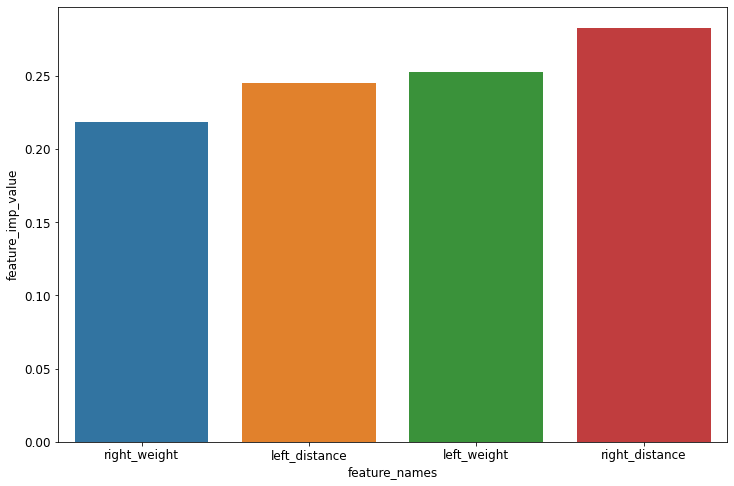

In [95]:
plt.figure(figsize=(12,8))
sns.barplot(x = feature_df.feature_names,y = feature_df.feature_imp_value);
plt.rcParams.update({'font.size': 22})

## Conclusive Results:  
- You can see that there is a **3%** Accuracy difference when we use the **Entropy Method**, however, the F1 Score, which is the trade Off which we should be looking seems more desirable for each class!  
- We tried a Grid Search then using the GINI Method, to find the best Hyperprarameters!  
- Here, our Hyperparamter Tuning was more focussed on Getting a Better Macro F1 Score! -> **72%** overall

# Happy learning!🌟